SINGLE TASK XG BOOST

In [2]:
import xgboost as xgb

# Load data
dtrain = xgb.DMatrix('train.data')
dval = xgb.DMatrix('val.data')

# Specify parameters
params = {
    'max_depth': 9,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    "min_child_weight": 1,
    "gamma": 0.48,
    "subsample": 1,
    "colsample_bytree": 0.7,
    "nthread": 8,
    "scale_pos_weight": 1,
    
}

# Specify validation set for early stopping
eval_list = [(dval, 'eval'), (dtrain, 'train')]

# Train model
num_round = 1000  # Number of training rounds
bst = xgb.train(params, dtrain, num_round, eval_list, early_stopping_rounds=100)


/home/user/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-auc:0.64372	train-auc:0.94959
[1]	eval-auc:0.65563	train-auc:0.98246
[2]	eval-auc:0.66319	train-auc:0.99157
[3]	eval-auc:0.67463	train-auc:0.99479
[4]	eval-auc:0.67082	train-auc:0.99834
[5]	eval-auc:0.67699	train-auc:0.99944
[6]	eval-auc:0.67225	train-auc:0.99985
[7]	eval-auc:0.67528	train-auc:0.99996
[8]	eval-auc:0.68581	train-auc:0.99999
[9]	eval-auc:0.68989	train-auc:1.00000
[10]	eval-auc:0.68905	train-auc:1.00000
[11]	eval-auc:0.68632	train-auc:1.00000
[12]	eval-auc:0.68946	train-auc:1.00000
[13]	eval-auc:0.69365	train-auc:1.00000
[14]	eval-auc:0.69522	train-auc:1.00000
[15]	eval-auc:0.69389	train-auc:1.00000
[16]	eval-auc:0.69552	train-auc:1.00000
[17]	eval-auc:0.69386	train-auc:1.00000
[18]	eval-auc:0.69434	train-auc:1.00000
[19]	eval-auc:0.69650	train-auc:1.00000
[20]	eval-auc:0.69777	train-auc:1.00000
[21]	eval-auc:0.69796	train-auc:1.00000
[22]	eval-auc:0.69967	train-auc:1.00000
[23]	eval-auc:0.69774	train-auc:1.00000
[24]	eval-auc:0.69904	train-auc:1.00000
[25]	eval-

AUC: 0.7190653523183643


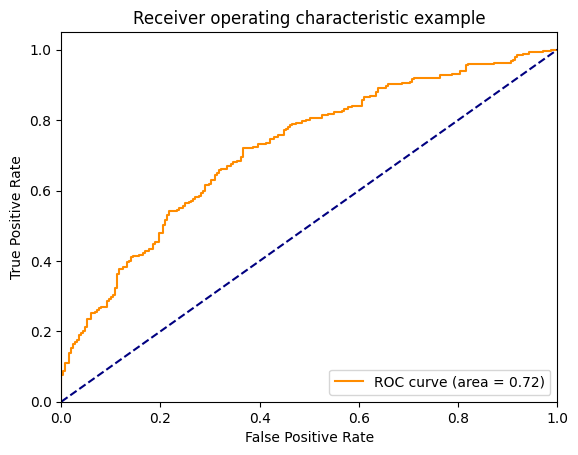

In [3]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Assume your validation labels are in a 1-D numpy array named y_val
# y_val = np.array([...])

# predict probabilities
# predict probabilities
y_pred_proba = bst.predict(dval)

# calculate AUC
y_val = dval.get_label()
auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC: {auc}")

# To plot ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()